In [2]:
import json
from collections import defaultdict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 
import numpy as np
import random
import gzip
import dateutil.parser
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def parseData(fname):
    for l in open(fname):
        yield eval(l)

def getBeerTypes(data):
    beer_types = defaultdict(set)
    for i in data:
        style = i['beer/style']
        if style not in beer_types:
            beer_types[style] = 1
        else:
            beer_types[style] += 1
    return beer_types

def getOverallRatings(data):
    beer_overall_ratings = defaultdict(set)
    for i in data:
        overall = i['review/overall']
        if overall not in beer_overall_ratings:
            beer_overall_ratings[overall] = 1
        else:
            beer_overall_ratings[overall] += 1
    return beer_overall_ratings

In [6]:
data = list(parseData("beer_50000.json"))

In [7]:
print(data[0])

{'review/appearance': 2.5, 'beer/style': 'Hefeweizen', 'review/palate': 1.5, 'review/taste': 1.5, 'beer/name': 'Sausa Weizen', 'review/timeUnix': 1234817823, 'beer/ABV': 5.0, 'beer/beerId': '47986', 'beer/brewerId': '10325', 'review/timeStruct': {'isdst': 0, 'mday': 16, 'hour': 20, 'min': 57, 'sec': 3, 'mon': 2, 'year': 2009, 'yday': 47, 'wday': 0}, 'review/overall': 1.5, 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.', 'user/profileName': 'stcules', 'review/aroma': 2.0}


In [8]:
beer_types = getBeerTypes(data)
print(beer_types)
print(len(beer_types))

beer_overall_ratings = getOverallRatings(data)
print(beer_overall_ratings)
print(len(beer_overall_ratings))


defaultdict(<class 'set'>, {'Hefeweizen': 618, 'English Strong Ale': 164, 'Foreign / Export Stout': 55, 'German Pilsener': 586, 'American Double / Imperial IPA': 3886, 'Herbed / Spiced Beer': 73, 'Oatmeal Stout': 102, 'American Pale Lager': 123, 'Rauchbier': 1938, 'American Pale Ale (APA)': 2288, 'American Porter': 2230, 'Belgian Strong Dark Ale': 146, 'Russian Imperial Stout': 2695, 'American Amber / Red Ale': 665, 'American Strong Ale': 166, 'MÃ¤rzen / Oktoberfest': 557, 'American Adjunct Lager': 242, 'American Blonde Ale': 357, 'American IPA': 4113, 'Fruit / Vegetable Beer': 1355, 'English Bitter': 267, 'English Porter': 367, 'Irish Dry Stout': 101, 'American Barleywine': 825, 'American Double / Imperial Stout': 5964, 'Doppelbock': 873, 'American Stout': 591, 'Maibock / Helles Bock': 225, 'Dortmunder / Export Lager': 31, 'Euro Strong Lager': 329, 'Low Alcohol Beer': 7, 'Light Lager': 503, 'Euro Pale Lager': 701, 'Bock': 148, 'English India Pale Ale (IPA)': 175, 'Altbier': 165, 'KÃ¶l

/var/folders/b3/fdd3r5fs7zq6m_ljpwlt1_h40000gn/T/ipykernel_47826/2793019354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='viridis')


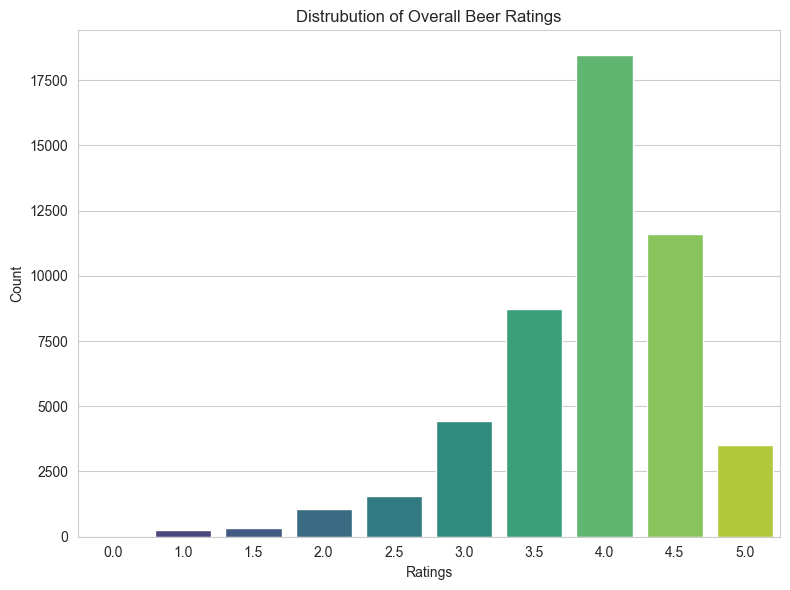

In [9]:
categories = beer_overall_ratings.keys()
values = beer_overall_ratings.values()

# Setting the style (optional, for aesthetics)
sns.set_style('whitegrid')

# Creating the bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values, palette='viridis')

# Adding titles and labels
plt.title('Distrubution of Overall Beer Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')

# Displaying the chart
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

/var/folders/b3/fdd3r5fs7zq6m_ljpwlt1_h40000gn/T/ipykernel_47826/1676007051.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=categories, x=values, palette='viridis')


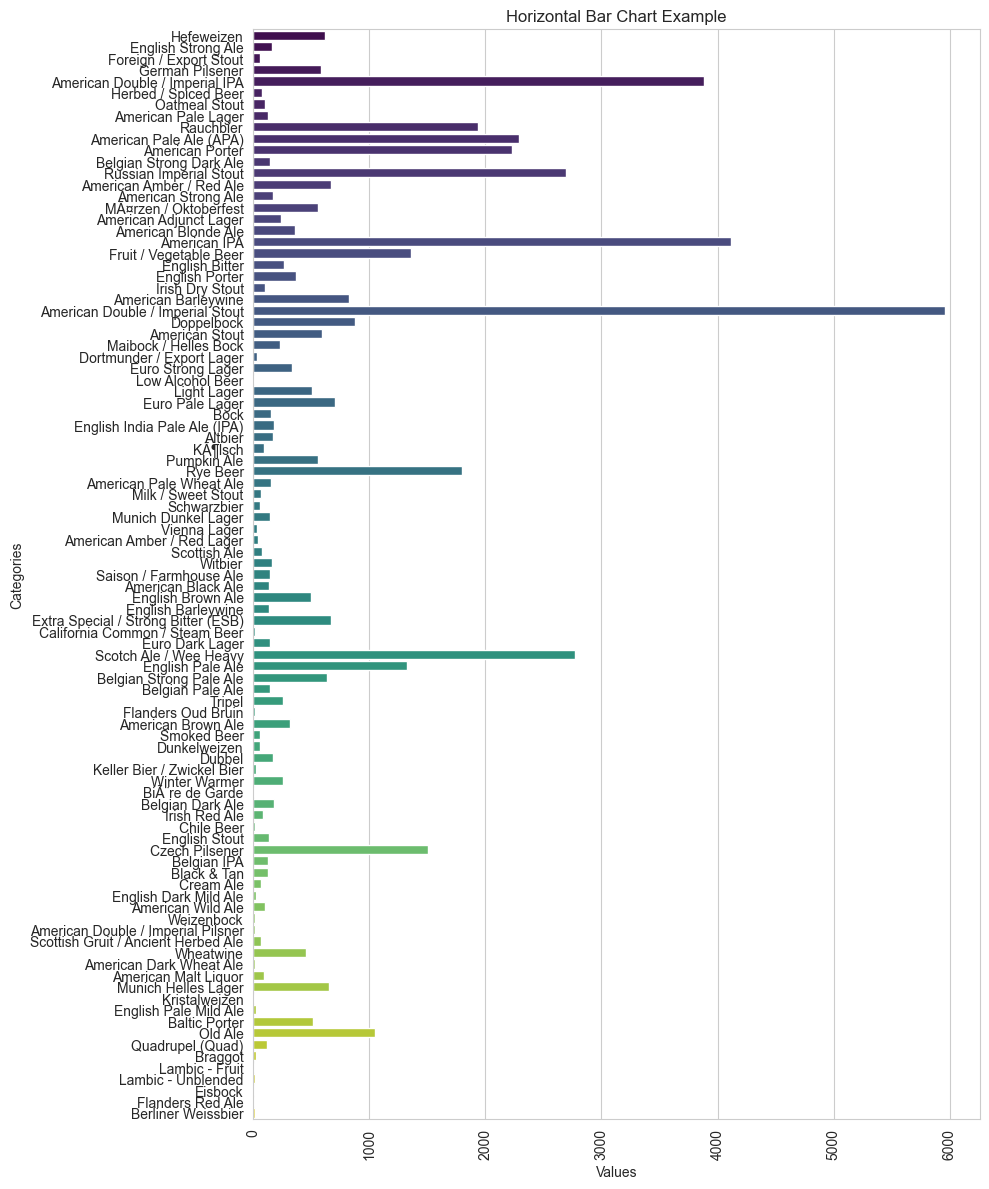

In [10]:
categories = beer_types.keys()
values = beer_types.values()

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))  # Adjust figure size as needed
sns.barplot(y=categories, x=values, palette='viridis')

# Adding titles and labels
plt.title('Horizontal Bar Chart Example')
plt.xlabel('Values')
plt.ylabel('Categories')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()